In [1]:
import torch
import os

print("CUDA available:", torch.cuda.is_available())
print("Device name:", torch.cuda.get_device_name(0) if torch.cuda.is_available() else "CPU")


CUDA available: True
Device name: Quadro RTX 4000


In [2]:
#imports
from datasets import load_dataset
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


/home/aaiteam4/anaconda3/envs/resume-ai/lib/python3.11/site-packages/requests/__init__.py:86: RequestsDependencyWarning: Unable to find acceptable character detection dependency (chardet or charset_normalizer).
  warnings.warn(


In [3]:
#loading the dataset
dataset = load_dataset("cnamuangtoun/resume-job-description-fit")

In [4]:
train = dataset['train']
test = dataset['test']

In [5]:
train_data = pd.DataFrame(train)
test_data = pd.DataFrame(test)

In [6]:
os.environ["TOKENIZERS_PARALLELISM"] = "false"

Batches:   0%|          | 0/98 [00:00<?, ?it/s]

Batches:   0%|          | 0/98 [00:00<?, ?it/s]

Batches:   0%|          | 0/28 [00:00<?, ?it/s]

Batches:   0%|          | 0/28 [00:00<?, ?it/s]

Fitting 3 folds for each of 9 candidates, totalling 27 fits
🔍 Best Params: {'C': 10, 'gamma': 'scale'}
🔝 Best Weighted F1 Score (CV): 0.6523825335798401

📊 Final Test Set Evaluation
Precision: 0.5412
Recall:    0.5446
F1 Score:  0.5391


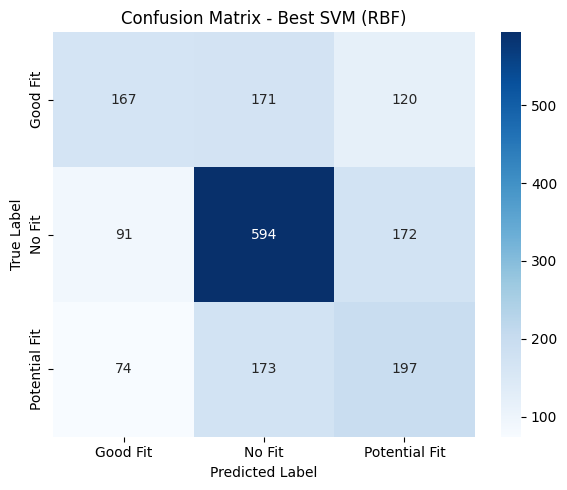

In [7]:
# 1. Imports
import numpy as np
import pandas as pd
from datasets import load_dataset
from sentence_transformers import SentenceTransformer
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import precision_score, recall_score, f1_score, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# 3. Preprocessing
def preprocess_text(text):
    return text.strip().lower()

for col in ['resume_text', 'job_description_text']:
    train_data[col] = train_data[col].apply(preprocess_text)
    test_data[col] = test_data[col].apply(preprocess_text)

# 4. Sentence-BERT Embedding
embedder = SentenceTransformer('all-MiniLM-L6-v2')

def compute_dual_embeddings(resumes, job_descriptions):
    resume_embeds = embedder.encode(resumes, convert_to_tensor=False, batch_size=64, show_progress_bar=True)
    jd_embeds = embedder.encode(job_descriptions, convert_to_tensor=False, batch_size=64, show_progress_bar=True)
    return np.hstack((resume_embeds, jd_embeds))

# 5. Prepare data
label_encoder = LabelEncoder()
y_train = label_encoder.fit_transform(train_data['label'])
y_test = label_encoder.transform(test_data['label'])

X_train = compute_dual_embeddings(train_data['resume_text'], train_data['job_description_text'])
X_test = compute_dual_embeddings(test_data['resume_text'], test_data['job_description_text'])

# 6. Grid Search for SVM (RBF Kernel)
param_grid = {
    'C': [0.1, 1, 10],
    'gamma': ['scale', 0.01, 0.001]
}

grid = GridSearchCV(
    estimator=SVC(kernel='rbf', class_weight='balanced'),
    param_grid=param_grid,
    scoring='f1_weighted',
    cv=3,
    verbose=2,
    n_jobs=-1
)

grid.fit(X_train, y_train)

print("🔍 Best Params:", grid.best_params_)
print("🔝 Best Weighted F1 Score (CV):", grid.best_score_)

# 7. Evaluate Best Model
best_svm = grid.best_estimator_
y_pred = best_svm.predict(X_test)

precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')

print("\n📊 Final Test Set Evaluation")
print(f"Precision: {precision:.4f}")
print(f"Recall:    {recall:.4f}")
print(f"F1 Score:  {f1:.4f}")

# 8. Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
labels = label_encoder.classes_

plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt='d', xticklabels=labels, yticklabels=labels, cmap="Blues")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix - Best SVM (RBF)")
plt.tight_layout()
plt.show()


Batches:   0%|          | 0/98 [00:00<?, ?it/s]

Batches:   0%|          | 0/98 [00:00<?, ?it/s]

Batches:   0%|          | 0/28 [00:00<?, ?it/s]

Batches:   0%|          | 0/28 [00:00<?, ?it/s]

Fitting 3 folds for each of 9 candidates, totalling 27 fits
🔍 Best Params: {'C': 10, 'gamma': 'scale'}
🔝 Best Weighted F1 Score (CV): 0.6523825335798401

📊 Final Test Set Evaluation
Precision: 0.5412
Recall:    0.5446
F1 Score:  0.5391


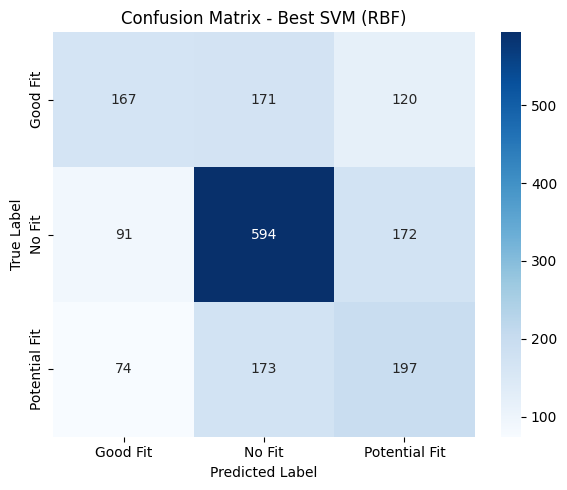

In [8]:
# 1. Imports #without lower
import numpy as np
import pandas as pd
from datasets import load_dataset
from sentence_transformers import SentenceTransformer
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import precision_score, recall_score, f1_score, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# 3. Preprocessing
def preprocess_text(text):
    return text.strip()

for col in ['resume_text', 'job_description_text']:
    train_data[col] = train_data[col].apply(preprocess_text)
    test_data[col] = test_data[col].apply(preprocess_text)

# 4. Sentence-BERT Embedding
embedder = SentenceTransformer('all-MiniLM-L6-v2')

def compute_dual_embeddings(resumes, job_descriptions):
    resume_embeds = embedder.encode(resumes, convert_to_tensor=False, batch_size=64, show_progress_bar=True)
    jd_embeds = embedder.encode(job_descriptions, convert_to_tensor=False, batch_size=64, show_progress_bar=True)
    return np.hstack((resume_embeds, jd_embeds))

# 5. Prepare data
label_encoder = LabelEncoder()
y_train = label_encoder.fit_transform(train_data['label'])
y_test = label_encoder.transform(test_data['label'])

X_train = compute_dual_embeddings(train_data['resume_text'], train_data['job_description_text'])
X_test = compute_dual_embeddings(test_data['resume_text'], test_data['job_description_text'])

# 6. Grid Search for SVM (RBF Kernel)
param_grid = {
    'C': [0.1, 1, 10],
    'gamma': ['scale', 0.01, 0.001]
}

grid = GridSearchCV(
    estimator=SVC(kernel='rbf', class_weight='balanced'),
    param_grid=param_grid,
    scoring='f1_weighted',
    cv=3,
    verbose=2,
    n_jobs=-1
)

grid.fit(X_train, y_train)

print("🔍 Best Params:", grid.best_params_)
print("🔝 Best Weighted F1 Score (CV):", grid.best_score_)

# 7. Evaluate Best Model
best_svm = grid.best_estimator_
y_pred = best_svm.predict(X_test)

precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')

print("\n📊 Final Test Set Evaluation")
print(f"Precision: {precision:.4f}")
print(f"Recall:    {recall:.4f}")
print(f"F1 Score:  {f1:.4f}")

# 8. Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
labels = label_encoder.classes_

plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt='d', xticklabels=labels, yticklabels=labels, cmap="Blues")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix - Best SVM (RBF)")
plt.tight_layout()
plt.show()


## Using a different Embeddings model (SentenceTransformer('all-mpnet-base-v2')
)

modules.json:   0%|          | 0.00/349 [00:00<?, ?B/s]

config_sentence_transformers.json:   0%|          | 0.00/116 [00:00<?, ?B/s]

README.md:   0%|          | 0.00/10.4k [00:00<?, ?B/s]

sentence_bert_config.json:   0%|          | 0.00/53.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/571 [00:00<?, ?B/s]

Xet Storage is enabled for this repo, but the 'hf_xet' package is not installed. Falling back to regular HTTP download. For better performance, install the package with: `pip install huggingface_hub[hf_xet]` or `pip install hf_xet`


model.safetensors:   0%|          | 0.00/438M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/363 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/239 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/190 [00:00<?, ?B/s]

Batches:   0%|          | 0/98 [00:00<?, ?it/s]

[CV] END ..................................C=0.1, gamma=0.01; total time= 1.5min
[CV] END .................................C=0.1, gamma=scale; total time= 1.5min
[CV] END .................................C=0.1, gamma=scale; total time= 1.5min
[CV] END ..................................C=10, gamma=scale; total time=  46.0s
[CV] END .................................C=0.1, gamma=0.001; total time= 1.5min
[CV] END ....................................C=1, gamma=0.01; total time= 1.5min
[CV] END ..................................C=0.1, gamma=0.01; total time= 1.5min
[CV] END .................................C=0.1, gamma=0.001; total time= 1.5min
[CV] END ..................................C=10, gamma=0.001; total time=  51.1s
[CV] END ...................................C=1, gamma=0.001; total time= 1.5min
[CV] END ....................................C=1, gamma=0.01; total time= 1.5min
[CV] END ...................................C=10, gamma=0.01; total time=  50.2s
[CV] END ...................

Batches:   0%|          | 0/98 [00:00<?, ?it/s]

Batches:   0%|          | 0/28 [00:00<?, ?it/s]

Batches:   0%|          | 0/28 [00:00<?, ?it/s]

Fitting 3 folds for each of 9 candidates, totalling 27 fits
🔍 Best Params: {'C': 10, 'gamma': 'scale'}
🔝 Best Weighted F1 Score (CV): 0.664315402002547

📊 Final Test Set Evaluation
Precision: 0.5371
Recall:    0.5259
F1 Score:  0.5285


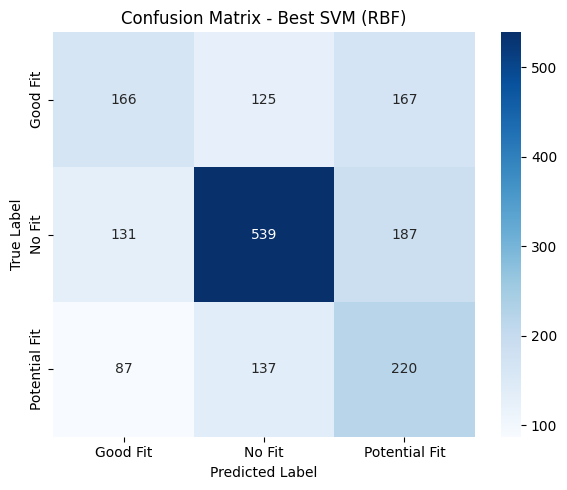

In [12]:
# 1. Imports #without lower
import numpy as np
import pandas as pd
from datasets import load_dataset
from sentence_transformers import SentenceTransformer
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import precision_score, recall_score, f1_score, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# 3. Preprocessing
def preprocess_text(text):
    return text.strip()

for col in ['resume_text', 'job_description_text']:
    train_data[col] = train_data[col].apply(preprocess_text)
    test_data[col] = test_data[col].apply(preprocess_text)

# 4. Sentence-BERT Embedding
embedder = SentenceTransformer('all-mpnet-base-v2')

def compute_dual_embeddings(resumes, job_descriptions):
    resume_embeds = embedder.encode(resumes, convert_to_tensor=False, batch_size=64, show_progress_bar=True)
    jd_embeds = embedder.encode(job_descriptions, convert_to_tensor=False, batch_size=64, show_progress_bar=True)
    return np.hstack((resume_embeds, jd_embeds))

# 5. Prepare data
label_encoder = LabelEncoder()
y_train = label_encoder.fit_transform(train_data['label'])
y_test = label_encoder.transform(test_data['label'])

X_train = compute_dual_embeddings(train_data['resume_text'], train_data['job_description_text'])
X_test = compute_dual_embeddings(test_data['resume_text'], test_data['job_description_text'])

# 6. Grid Search for SVM (RBF Kernel)
param_grid = {
    'C': [0.1, 1, 10],
    'gamma': ['scale', 0.01, 0.001]
}

grid = GridSearchCV(
    estimator=SVC(kernel='rbf', class_weight='balanced'),
    param_grid=param_grid,
    scoring='f1_weighted',
    cv=3,
    verbose=2,
    n_jobs=-1
)

grid.fit(X_train, y_train)

print("🔍 Best Params:", grid.best_params_)
print("🔝 Best Weighted F1 Score (CV):", grid.best_score_)

# 7. Evaluate Best Model
best_svm = grid.best_estimator_
y_pred = best_svm.predict(X_test)

precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')

print("\n📊 Final Test Set Evaluation")
print(f"Precision: {precision:.4f}")
print(f"Recall:    {recall:.4f}")
print(f"F1 Score:  {f1:.4f}")

# 8. Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
labels = label_encoder.classes_

plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt='d', xticklabels=labels, yticklabels=labels, cmap="Blues")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix - Best SVM (RBF)")
plt.tight_layout()
plt.show()


In [13]:
# 10. Predict on Custom Resume + Job Description
def predict_fit(resume_text, job_description_text):
    resume_text = preprocess_text(resume_text)
    job_description_text = preprocess_text(job_description_text)
    embedding = compute_dual_embeddings([resume_text], [job_description_text])
    prediction = best_svm.predict(embedding)
    return label_encoder.inverse_transform(prediction)[0]

# Example usage
custom_resume = """Experienced software engineer with expertise in Python, Django, and REST API development. Worked on building scalable backend systems for e-commerce applications."""
custom_jd = """Looking for a backend developer skilled in Python and RESTful API design, preferably with Django experience."""

predicted_label = predict_fit(custom_resume, custom_jd)
print(f"Predicted Fit Category: {predicted_label}")

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Predicted Fit Category: Potential Fit


In [14]:
from sklearn.metrics.pairwise import cosine_similarity

def compute_similarity_scores(resume_embed, jd_embed):
    similarities = cosine_similarity(resume_embed, jd_embed)
    return np.diag(similarities)  # each resume vs its own JD

resume_embeds = X_test[:, :384]
jd_embeds = X_test[:, 384:]


similarity_scores = compute_similarity_scores(resume_embeds, jd_embeds)


threshold = 0.6  # Adjust based on your performance tuning

ml_predictions = best_svm.predict(X_test)
ml_labels = label_encoder.inverse_transform(ml_predictions)

intersection_indices = [
    i for i, (label, score) in enumerate(zip(ml_labels, similarity_scores))
    if label == 'Good Fit' and score >= threshold
]

# Optional: View or extract filtered results
filtered_results = test_data.iloc[intersection_indices]

# View intersected resume rows from the test set
intersected_resumes = test_data.iloc[intersection_indices][['resume_text', 'job_description_text']]
intersected_resumes.reset_index(drop=True, inplace=True)
print(intersected_resumes.head())

ValueError: Incompatible dimension for X and Y matrices: X.shape[1] == 384 while Y.shape[1] == 1152

In [ ]:
# Prepare color: green for intersection, gray otherwise
colors = ['green' if i in intersection_indices else 'gray' for i in range(len(similarity_scores))]

plt.figure(figsize=(12, 6))
plt.scatter(range(len(similarity_scores)), similarity_scores, c=colors, alpha=0.7)
plt.axhline(y=threshold, color='red', linestyle='--', label=f'Threshold = {threshold}')
plt.xlabel('Resume Index')
plt.ylabel('Semantic Similarity Score')
plt.title('Resume Similarity Scores and Intersection with ML Predictions')
plt.legend()
plt.tight_layout()
plt.show()